In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
generator = keras.models.load_model('./datas/weights/msggan/afhq/msgGenerator.h5')
latent_dim = generator.input.shape[1]
print(f"Generator model loaded with latent dim: {latent_dim}")

2022-04-27 09:12:29.185918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-27 09:12:29.185957: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-27 09:12:29.185985: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-04-27 09:12:29.186275: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generator model loaded with latent dim: 100


In [4]:
# Saját modell az inception v3 alapjaira (Transfer learning)
# (64, 64, 3)-as képeket vár bemenetként, majd one-hot encoding alapján adja ki a classokat (3 class)
# nem logits kimenetű
inception_model = keras.models.load_model('datas/weights/classifier/animalFacesClassifier.h5')

In [5]:
# Gradient Descent with momentum
cross_entropy = keras.losses.CategoricalCrossentropy(from_logits=False)

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    result_noises = []
    losses = []
    preds = []
    
    change = 0
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)[0]
            
            predictions = inception_model(generated_image)
            
            loss = cross_entropy(goal_label, predictions[0])
            
            
        result_noises.append(noise)
        preds.append(predictions[0])
        losses.append(loss)

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(predictions)
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
            plt.show()

    return result_noises, losses, preds

In [6]:
def make_onehot_from_dict(input_data):
    return [input_data['cat'], input_data['dog'], input_data['wild']]

tf.Tensor([[4.14070301e-02 1.14429444e-04 9.58478510e-01]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 9.075551986694336


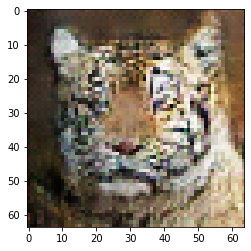

tf.Tensor([[0.87901545 0.03412004 0.08686451]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 3.3778703212738037


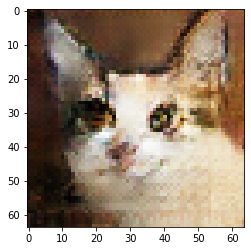

tf.Tensor([[0.23839402 0.7563677  0.00523827]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 0.27922767400741577


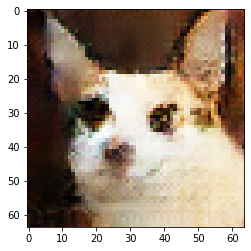

tf.Tensor([[0.01004676 0.9887967  0.00115658]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 0.011266639456152916


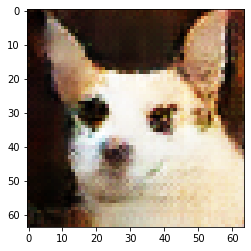

tf.Tensor([[0.20374021 0.7272804  0.06897944]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.3184432089328766


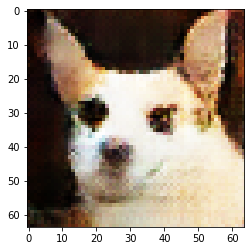

tf.Tensor([[0.23570414 0.72189367 0.04240221]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.32587742805480957


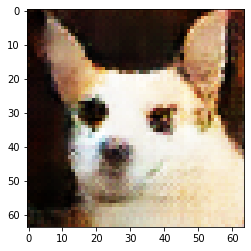

tf.Tensor([[0.09035476 0.90008676 0.00955852]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.10526411980390549


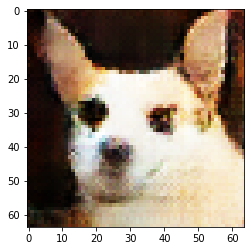

tf.Tensor([[5.3039575e-03 9.9381894e-01 8.7705039e-04]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.006200183182954788


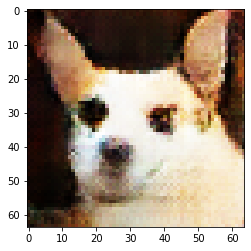

tf.Tensor([[0.06129729 0.93534565 0.00335705]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.06683913618326187


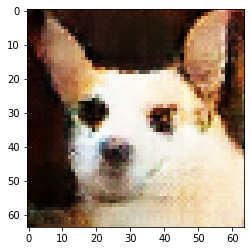

tf.Tensor([[0.06996311 0.92311317 0.00692375]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.08000344038009644


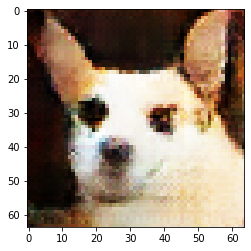

tf.Tensor([[2.2979068e-02 9.7634310e-01 6.7783071e-04]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.023941222578287125


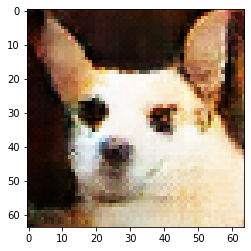

tf.Tensor([[0.00145412 0.9973277  0.00121812]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.0026758317835628986


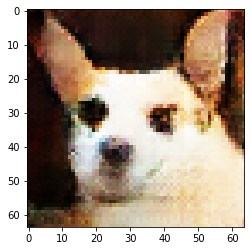

tf.Tensor([[1.9501229e-03 9.9783128e-01 2.1865962e-04]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.0021711895242333412


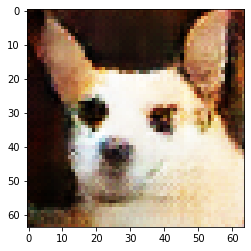

tf.Tensor([[0.02668768 0.9708554  0.00245696]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.029577724635601044


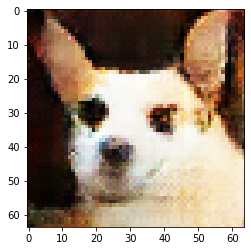

tf.Tensor([[0.13493074 0.86050236 0.00456694]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.15023891627788544


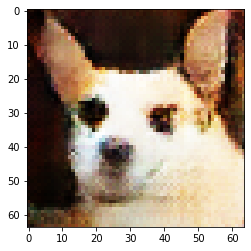

tf.Tensor([[0.01769076 0.9794939  0.00281537]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.0207193735986948


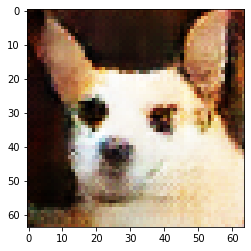

tf.Tensor([[1.2721246e-03 9.9834549e-01 3.8236179e-04]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.001655875938013196


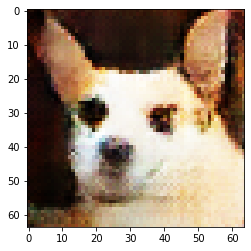

tf.Tensor([[1.2751307e-03 9.9841821e-01 3.0657920e-04]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.0015829807380214334


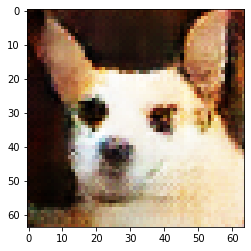

tf.Tensor([[0.01287126 0.98550767 0.00162102]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.014598311856389046


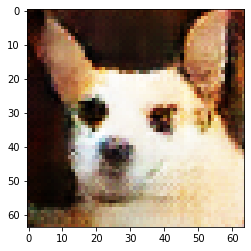

tf.Tensor([[6.1711213e-03 9.9322355e-01 6.0539402e-04]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.0067995162680745125


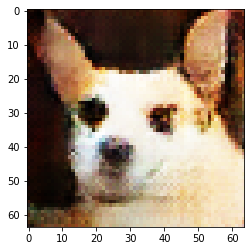

tf.Tensor([[0.01287984 0.9853753  0.00174501]], shape=(1, 3), dtype=float32)
Step: 20, Loss: 0.01473283115774393


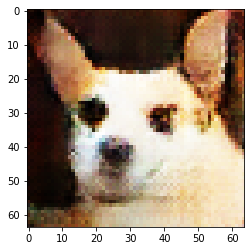

tf.Tensor(0.014732831, shape=(), dtype=float32)


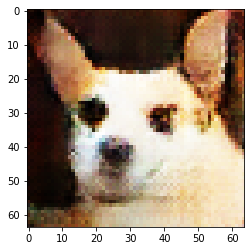

In [12]:
# TODO: a keresést egyszerre több elemre végezni, hogy ne egymás után kelljen

# Strukturált adat
input_data = {
    "cat": 0.0,
    "dog": 1.0,
    "wild": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
goal_prediction = make_onehot_from_dict(input_data)

#starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
starting_noise = tf.random.normal([1, latent_dim])
#starting_noise = tf.random.truncated_normal([1, latent_dim])
#starting_noise = result_noises[-1]
step_size = 0.05
momentum = 0.5

n_steps = 21

result_noises, losses, preds =\
    gradient_descent_momentum(goal_prediction, starting_noise, step_size, momentum, n_steps, verbose=True)

print(losses[-1])
generated_image = generator(result_noises[-1], training=False)[0]
plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

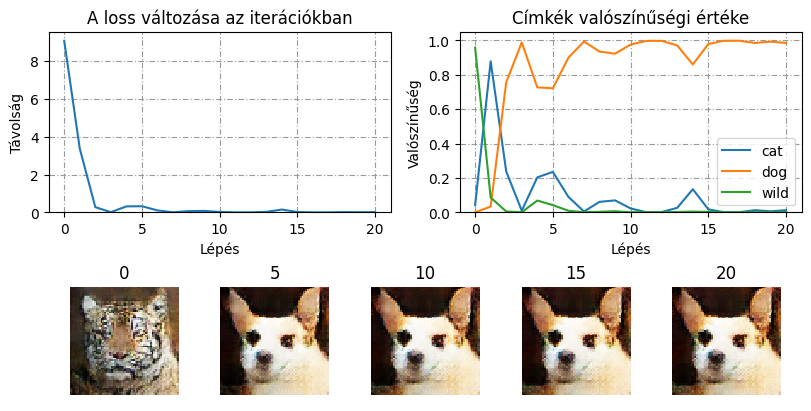

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=100, constrained_layout=True)
axs = fig.subplot_mosaic([['Losses', 'Classes'],['Images', 'Images']],
                          gridspec_kw={'width_ratios':[2, 2], 'height_ratios':[1.5,1]})
axs['Losses'].set_xlabel('Lépés')
axs['Losses'].set_ylabel('Távolság')
axs['Losses'].set_title('A loss változása az iterációkban')
axs['Losses'].grid(True, color='0.6', dashes=(5, 2, 1, 2))
axs['Losses'].plot(losses)
axs['Losses'].set_ylim(bottom=0)

axs['Classes'].set_ylabel('Valószínűség')
axs['Classes'].set_xlabel('Lépés')
axs['Classes'].set_title('Címkék valószínűségi értéke')

axs['Classes'].grid(True, color='0.6', dashes=(5, 2, 1, 2))

axs['Classes'].plot(preds, label=['cat', 'dog', 'wild'])

axs['Classes'].set_ylim(bottom=0)
axs['Classes'].legend(loc=0, handlelength=2)

inserted = []
axs['Images'].axis('off')
pad = 0.01
inserted.append(axs['Images'].inset_axes([0.0, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.2, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.4, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.6, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.8, 0.05, 0.2, 0.9]))

for i in range(5):
    generated_image = generator(result_noises[i*5], training=False)[0]
    inserted[i].axis('off')
    inserted[i].set_title(i*5)
    inserted[i].imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

In [9]:
# Egy kutya és egy macska keresése, majd interpoláció a kettő között:

dog_label = [0, 1, 0]
cat_label = [1, 0, 0]

starting_noise = tf.random.truncated_normal([1, latent_dim])
dog_noise, _, _ =\
        gradient_descent_momentum(dog_label, starting_noise, 0.1, 0.5, 20, verbose=False)

starting_noise = tf.random.truncated_normal([1, latent_dim])
cat_noise, _, _ =\
        gradient_descent_momentum(cat_label, starting_noise, 0.1, 0.5, 20, verbose=False)

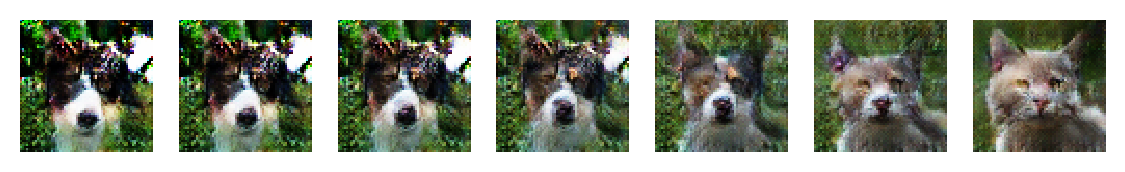

In [9]:
from scipy.interpolate import interp1d
import numpy as np

step_size = 8
linfit = interp1d([1, step_size], np.vstack([dog_noise[-1], cat_noise[-1]]), axis=0)

res = []
for j in range(1,step_size):
    generated_image = generator(linfit(j).reshape(1, latent_dim), training=False)[0]
    res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)
for i in range(len(res)):
    gen_1 = res[i][0].numpy()*127.5+127.5
    axes[i].axis('off')
    axes[i].imshow((gen_1).astype("uint8"), interpolation='none')
plt.show()

2022-04-23 19:35:57.280787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0.00928775 0.98960364 0.0011086141


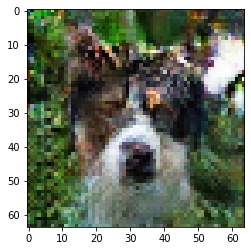

In [10]:
pon = 3

plt.imshow((res[pon][0].numpy()*127.5+127.5).astype("uint"))

result = inception_model.predict(res[pon])
print(result[0][0], result[0][1], result[0][2])

tf.Tensor([[0.07045723 0.92387605 0.00566666]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 3.1568307876586914


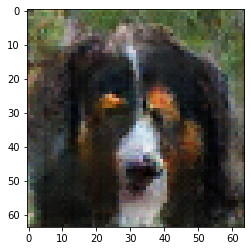

tf.Tensor([[0.00354447 0.99360573 0.00284968]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 5.686002731323242


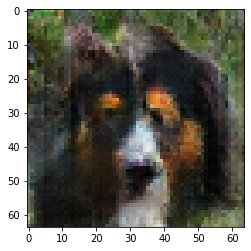

tf.Tensor([[0.01218905 0.97970164 0.00810933]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 4.488722324371338


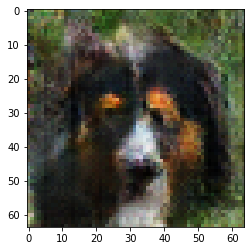

tf.Tensor([[0.02466322 0.964729   0.01060777]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 3.871187686920166


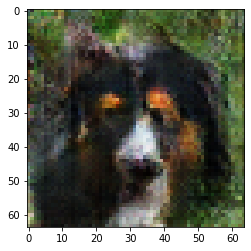

tf.Tensor([[0.11217314 0.8712584  0.01656852]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 2.5702195167541504


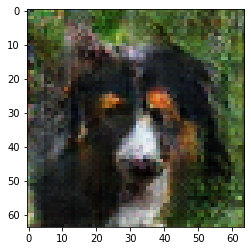

tf.Tensor([[0.00117777 0.9960299  0.00279226]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 6.571485996246338


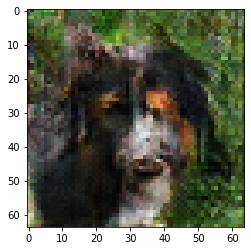

tf.Tensor([[0.00109014 0.00732897 0.9915809 ]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 5.458852291107178


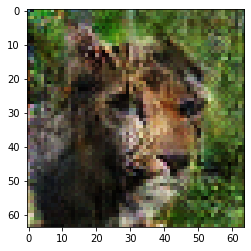

tf.Tensor([[0.00581381 0.00184107 0.99234515]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 4.1195526123046875


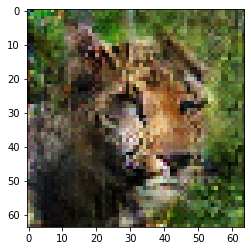

tf.Tensor([[0.18777384 0.04919075 0.76303536]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 1.392103672027588


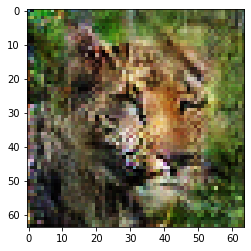

tf.Tensor([[0.56525826 0.08592924 0.34881258]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.667022168636322


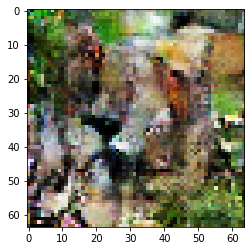

tf.Tensor([[0.36314562 0.06694939 0.569905  ]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.9228181838989258


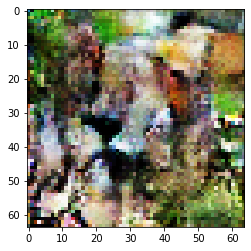

tf.Tensor([[0.80590725 0.03289343 0.16119933]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.5376520156860352


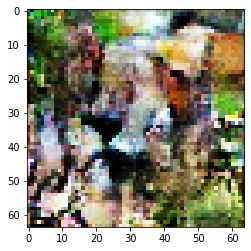

tf.Tensor([[0.64104915 0.0704583  0.28849256]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.6043365001678467


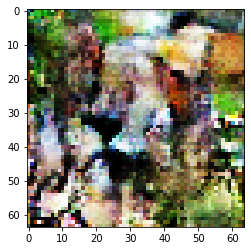

tf.Tensor([[0.63663954 0.0537143  0.30964622]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.5957063436508179


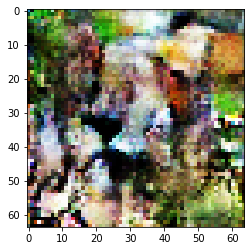

tf.Tensor([[0.6836917  0.02647074 0.2898375 ]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.5518854260444641


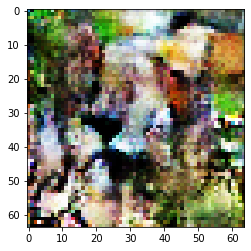

tf.Tensor([[0.5281418  0.03899577 0.43286237]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.6781793832778931


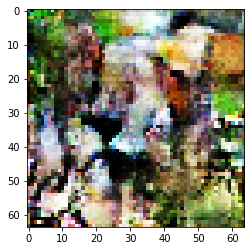

tf.Tensor([[0.68780506 0.02176265 0.29043227]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.5466768145561218


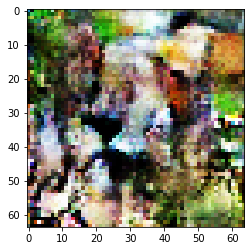

tf.Tensor([[0.6959847  0.10043488 0.20358035]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.6082809567451477


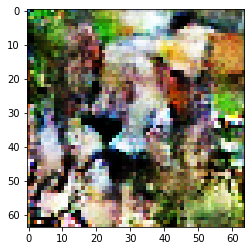

tf.Tensor([[0.6296714  0.11714229 0.25318626]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.6447716951370239


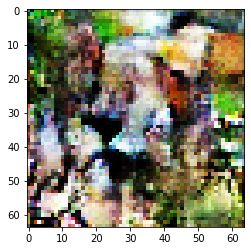

tf.Tensor([[0.78554684 0.02497672 0.18947645]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.5257982611656189


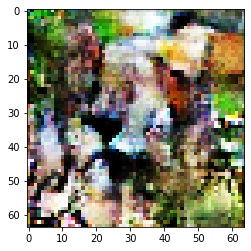

In [11]:
# Mixelt label-ök súly szerint

mixed_label = [0.8, 0.0, 0.2]

starting_noise = tf.random.truncated_normal([1, latent_dim])
mixed_noise, _, _ =\
        gradient_descent_momentum(mixed_label, starting_noise, 0.05, 0.5, 20, verbose=True)